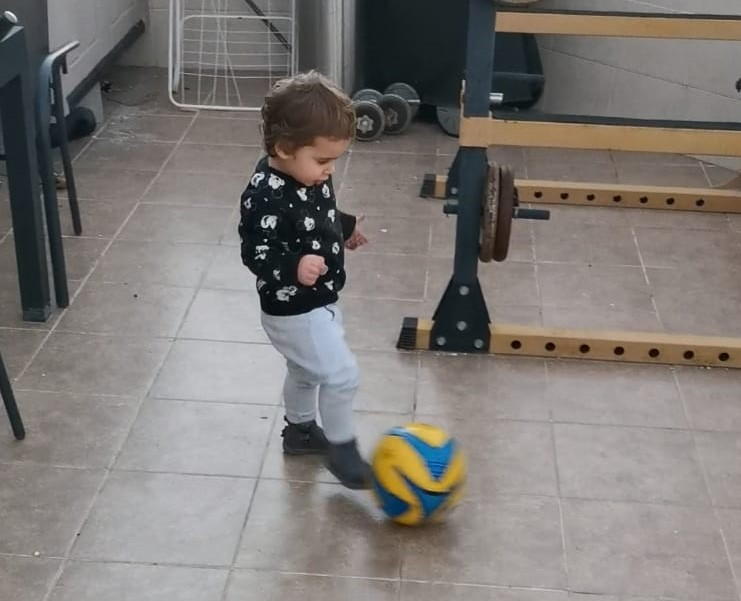

### imports

In [5]:
#imports of the used library
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import matthews_corrcoef
from numpy import nan
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from numba import jit, cuda

### load of the data

In [6]:
#loading the data
df = pd.read_csv('C:\matala 3\FIFAvsReal-Life.csv')
df_no_change = pd.read_csv('C:\matala 3\FIFAvsReal-Life.csv')

In [7]:
#Look at the inital Data 
df

Unnamed: 0             Players                 club  \
0            NaN                 NaN                  NaN   
1            0.0     Aaron Cresswell      West Ham United   
2            1.0        Aaron Hughes  Heart of Midlothian   
3            2.0          Aaron Hunt         Hamburger SV   
4            3.0        Aaron Lennon              Everton   
...          ...                 ...                  ...   
3918      3917.0  Zlatan Ibrahimovic    Manchester United   
3919      3918.0    Zlatko Junuzovic     SV Werder Bremen   
3920      3919.0         Zoltan Gera           Free Agent   
3921      3920.0      Zoltan Stieber          D.C. United   
3922      3921.0      Zouhair Feddal  Real Betis Balompie   

                        league   age       nationality    Position  overall  \
0                          NaN   NaN               NaN         NaN      NaN   
1       English Premier League  27.0           England    Defender     76.0   
2         Scottish Premiership  37.0  Northern Ireland    Defender     71.0   
3            German Bundesliga  30.0           Germany  Midfielder     76.0   
4       English Premier League  30.0           England  Midfielder     77.0   
...                        ...   ...               ...         ...      ...   
3918    English Premier League  35.0            Sweden     Forward     88.0   
3919         German Bundesliga  29.0           Austria  Midfielder     79.0   
3920         Rest Of The World  38.0           Hungary  Midfielder     74.0   
3921   USA Major League Soccer  28.0           Hungary  Midfielder     70.0   
3922  Spanish Primera Division  27.0           Morocco    Defender     77.0   

       pac   sho  ...  12/13.9  12/13.10  12/13.11  12/13.12  12/13.13  \
0      NaN   NaN  ...      Sub        CO       Off    Pen SV     Pen M   
1     76.0  59.0  ...      0.0       0.0       0.0       0.0       0.0   
2     23.0  35.0  ...     15.0       1.0       0.0       0.0       0.0   
3     68.0  73.0  ...      2.0       2.0       6.0       0.0       1.0   
4     83.0  64.0  ...      1.0       1.0      15.0       0.0       0.0   
...    ...   ...  ...      ...       ...       ...       ...       ...   
3918  65.0  88.0  ...      1.0       1.0       0.0       0.0       0.0   
3919  78.0  74.0  ...      2.0       2.0       8.0       0.0       0.0   
3920  49.0  73.0  ...      5.0       2.0       9.0       0.0       0.0   
3921  70.0  66.0  ...      4.0       2.0       5.0       0.0       0.0   
3922  55.0  49.0  ...      0.0       0.0       0.0       0.0       0.0   

            12/13.14     12/13.15 12/13.16 12/13.17           12/13.18  
0     Goals conceded  Conceded 1+       OG     Apps               Form  
1                0.0          0.0      0.0      0.0                0.0  
2               43.0         23.0      0.0     24.0              1.625  
3                0.0          0.0      0.0     28.0  4.035714285714286  
4                0.0          0.0      0.0     34.0  3.147058823529412  
...              ...          ...      ...      ...                ...  
3918             0.0          0.0      0.0     34.0  6.735294117647059  
3919             0.0          0.0      0.0     30.0                2.4  
3920             0.0          0.0      0.0     16.0               3.25  
3921             0.0          0.0      0.0     16.0             2.9375  
3922             0.0          0.0      0.0      0.0                0.0  

[3923 rows x 149 columns]

In [8]:
df.groupby('Position').size()['Forward']

849

###  data info

In [9]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923 entries, 0 to 3922
Columns: 149 entries, Unnamed: 0 to 12/13.18
dtypes: float64(46), object(103)
memory usage: 4.5+ MB


In [10]:
# numeral information of the data frame 
df.describe().transpose()

count         mean          std   min     25%  \
Unnamed: 0                3922.0  1960.500000  1132.328206   0.0  980.25   
age                       3922.0    25.977562     4.485916  16.0   22.00   
overall                   3922.0    71.811066     6.331105  48.0   68.00   
pac                       3922.0    69.197348    11.547373  23.0   64.00   
sho                       3922.0    58.743243    14.202873  14.0   49.00   
pas                       3922.0    63.142529    10.081475  27.0   57.00   
dri                       3922.0    68.022693    10.089765  28.0   63.00   
def                       3922.0    53.364865    18.535414  15.0   36.00   
phy                       3922.0    68.148139     9.279212  32.0   63.00   
international_reputation  3922.0     1.434472     0.681983   1.0    1.00   
skill_moves               3922.0     2.441866     0.815128   1.0    2.00   
weak_foot                 3922.0     3.042325     0.685213   1.0    3.00   
crossing                  3922.0    55.333503    19.570313   7.0   44.00   
finishing                 3922.0    49.866395    20.705708   5.0   34.00   
heading_accuracy          3922.0    56.713157    18.478316   8.0   49.00   
short_passing             3922.0    64.240439    14.892287  11.0   60.00   
volleys                   3922.0    48.650433    19.604543   5.0   34.00   
dribbling                 3922.0    60.653748    19.728583   6.0   55.00   
curve                     3922.0    53.424528    19.799983   6.0   41.00   
free_kick_accuracy        3922.0    48.134115    19.080518   4.0   35.00   
long_passing              3922.0    58.091280    15.462333  10.0   50.00   
ball_control              3922.0    64.452320    17.094540  10.0   61.00   
acceleration              3922.0    66.070117    14.616144  13.0   58.00   
sprint_speed              3922.0    66.344467    14.240060  15.0   59.00   
agility                   3922.0    65.775880    14.476216  17.0   58.00   
reactions                 3922.0    67.910505     8.535441  30.0   62.00   
balance                   3922.0    64.596634    14.437280  16.0   56.00   
shot_power                3922.0    61.507394    17.867790  12.0   54.00   
jumping                   3922.0    67.074962    11.785012  25.0   61.00   
stamina                   3922.0    65.788373    15.526321  14.0   60.00   
strength                  3922.0    68.280979    11.875753  24.0   61.00   
long_shots                3922.0    53.056094    20.156159   5.0   40.00   
aggression                3922.0    60.710607    17.693893  11.0   49.00   
interceptions             3922.0    51.013004    22.292338   5.0   29.00   
positioning               3922.0    54.828404    20.784055   3.0   44.00   
vision                    3922.0    58.018103    15.290986  10.0   49.00   
penalties                 3922.0    53.319990    16.655284  10.0   43.00   
composure                 3922.0    64.528047    12.260097  12.0   59.00   
marking                   3922.0    47.277155    23.537897   5.0   23.00   
standing_tackle           3922.0    51.403366    23.620047   8.0   29.00   
sliding_tackle            3922.0    48.996685    23.682552   6.0   25.00   
gk_diving                 3922.0    16.884243    19.003157   1.0    8.00   
gk_handling               3922.0    16.579806    18.162599   1.0    8.00   
gk_kicking                3922.0    16.272055    17.368141   1.0    8.00   
gk_positioning            3922.0    16.608363    18.258902   1.0    8.00   
gk_reflexes               3922.0    16.982407    19.403682   1.0    8.00   

                             50%      75%     max  
Unnamed: 0                1960.5  2940.75  3921.0  
age                         26.0    29.00    40.0  
overall                     72.0    76.00    94.0  
pac                         70.0    77.00    96.0  
sho                         62.0    69.00    93.0  
pas                         64.0    70.00    95.0  
dri                         69.0    75.00    96.0  
def                         58.0    70

### Checking and Cleaning the data

In [11]:
#checking the data that is different for their type
df.iloc[:, 46:149]

marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0         NaN              NaN             NaN        NaN          NaN   
1        76.0             75.0            77.0       14.0          7.0   
2        75.0             73.0            71.0        8.0          6.0   
3        28.0             34.0            35.0       15.0         12.0   
4        40.0             37.0            37.0       14.0          7.0   
...       ...              ...             ...        ...          ...   
3918     15.0             41.0            27.0       13.0         15.0   
3919     68.0             66.0            63.0       15.0          9.0   
3920     53.0             58.0            68.0       14.0         12.0   
3921     26.0             31.0            32.0        6.0          6.0   
3922     78.0             79.0            71.0       13.0         14.0   

      gk_kicking  gk_positioning  gk_reflexes   16/17 16/17.1  ... 12/13.9  \
0            NaN             NaN          NaN  Points   Start  ...     Sub   
1            9.0             9.0         12.0    59.0    24.0  ...     0.0   
2           16.0            12.0         11.0     0.0     0.0  ...    15.0   
3            7.0            16.0         15.0    57.0    14.0  ...     2.0   
4            7.0            16.0         11.0    20.0     6.0  ...     1.0   
...          ...             ...          ...     ...     ...  ...     ...   
3918        10.0             9.0         12.0   146.0    27.0  ...     1.0   
3919        11.0            15.0          8.0    97.0    28.0  ...     2.0   
3920        12.0             7.0          9.0     0.0     0.0  ...     5.0   
3921         9.0            16.0          7.0     0.0     0.0  ...     4.0   
3922        12.0            10.0          8.0    84.0    27.0  ...     0.0   

     12/13.10 12/13.11 12/13.12 12/13.13        12/13.14     12/13.15  \
0          CO      Off   Pen SV    Pen M  Goals conceded  Conceded 1+   
1         0.0      0.0      0.0      0.0             0.0          0.0   
2         1.0      0.0      0.0      0.0            43.0         23.0   
3         2.0      6.0      0.0      1.0             0.0          0.0   
4         1.0     15.0      0.0      0.0             0.0          0.0   
...       ...      ...      ...      ...             ...          ...   
3918      1.0      0.0      0.0      0.0             0.0          0.0   
3919      2.0      8.0      0.0      0.0             0.0          0.0   
3920      2.0      9.0      0.0      0.0             0.0          0.0   
3921      2.0      5.0      0.0      0.0             0.0          0.0   
3922      0.0      0.0      0.0      0.0             0.0          0.0   

     12/13.16 12/13.17           12/13.18  
0          OG     Apps               Form  
1         0.0      0.0                0.0  
2         0.0     24.0              1.625  
3         0.0     28.0  4.035714285714286  
4         0.0     34.0  3.147058823529412  
...       ...      ...                ...  
3918      0.0     34.0  6.735294117647059  
3919      0.0     30.0                2.4  
3920      0.0     16.0               3.25  
3921      0.0     16.0             2.9375  
3922      0.0      0.0                0.0  

[3923 rows x 103 columns]

In [12]:
df[['Position','age']].groupby('Position').mean()

age
Position             
Defender    26.265976
Forward     25.493522
Goalkeeper  27.182482
Midfielder  25.699468

In [13]:
#dropping wide data that show the performance by seasons
df.drop(df.iloc[:, 49:149], inplace = True, axis = 1) 

In [14]:
#checking categorial data
df.iloc[:, 0:7]

Unnamed: 0             Players                 club  \
0            NaN                 NaN                  NaN   
1            0.0     Aaron Cresswell      West Ham United   
2            1.0        Aaron Hughes  Heart of Midlothian   
3            2.0          Aaron Hunt         Hamburger SV   
4            3.0        Aaron Lennon              Everton   
...          ...                 ...                  ...   
3918      3917.0  Zlatan Ibrahimovic    Manchester United   
3919      3918.0    Zlatko Junuzovic     SV Werder Bremen   
3920      3919.0         Zoltan Gera           Free Agent   
3921      3920.0      Zoltan Stieber          D.C. United   
3922      3921.0      Zouhair Feddal  Real Betis Balompie   

                        league   age       nationality    Position  
0                          NaN   NaN               NaN         NaN  
1       English Premier League  27.0           England    Defender  
2         Scottish Premiership  37.0  Northern Ireland    Defender  
3            German Bundesliga  30.0           Germany  Midfielder  
4       English Premier League  30.0           England  Midfielder  
...                        ...   ...               ...         ...  
3918    English Premier League  35.0            Sweden     Forward  
3919         German Bundesliga  29.0           Austria  Midfielder  
3920         Rest Of The World  38.0           Hungary  Midfielder  
3921   USA Major League Soccer  28.0           Hungary  Midfielder  
3922  Spanish Primera Division  27.0           Morocco    Defender  

[3923 rows x 7 columns]

In [15]:
#dropping categorial data that useless for the classification
df.drop(df.iloc[:, 0:4], inplace = True, axis = 1) 
df.drop(['nationality'], inplace = True, axis = 1) 

In [16]:
df.shape

(3923, 44)

### changing the data from categorial to numeral

In [17]:
rows = df.shape[0]

for row in range(1,rows):

    val = df.loc[row,'Position']
    if val=='Defender' :
        df.loc[row,'Position'] = 0
    elif val=='Midfielder' :
        df.loc[row,'Position'] = 1
    else :
        df.loc[row,'Position'] = 2
(df['Position']).value_counts()

1    1504
2    1260
0    1158
Name: Position, dtype: int64

In [18]:
rows = df.shape[0]

for row in range(1,rows):

    val = df.loc[row,'work_rate_att']
    if val=='High' :
        df.loc[row,'work_rate_att'] = 0
    elif val=='Low' :
        df.loc[row,'work_rate_att'] = 1
    else :
        df.loc[row,'work_rate_att'] = 2
        rows = df.shape[0]

for row in range(1,rows):

    val = df.loc[row,'work_rate_def']
    if val=='High' :
        df.loc[row,'work_rate_def'] = 0
    elif val=='Low' :
        df.loc[row,'work_rate_def'] = 1
    else :
        df.loc[row,'work_rate_def'] = 2

### checking the values of the changes to be true 

In [19]:
(df['work_rate_def']).value_counts()

2    2845
0     726
1     351
Name: work_rate_def, dtype: int64

In [20]:
(df['work_rate_att']).value_counts()

2    2551
0    1186
1     185
Name: work_rate_att, dtype: int64

In [21]:
df['international_reputation'].value_counts()

1.0    2583
2.0    1033
3.0     253
4.0      47
5.0       6
Name: international_reputation, dtype: int64

In [22]:
df['preferred_foot'] = np.where(df['preferred_foot']=="Right", 1, 0)
df['international_reputation'] = np.where(df['international_reputation']==1, 1, 0)
df['preferred_foot'].value_counts()

1    2931
0     992
Name: preferred_foot, dtype: int64

In [23]:
df['international_reputation'].value_counts()

1    2583
0    1340
Name: international_reputation, dtype: int64

### checking for NaN values  

In [24]:
df.isnull().values.any()

True

In [25]:
df.isnull().sum()

age                         1
Position                    1
overall                     1
pac                         1
sho                         1
pas                         1
dri                         1
def                         1
phy                         1
international_reputation    0
skill_moves                 1
weak_foot                   1
work_rate_att               1
work_rate_def               1
preferred_foot              0
crossing                    1
finishing                   1
heading_accuracy            1
short_passing               1
volleys                     1
dribbling                   1
curve                       1
free_kick_accuracy          1
long_passing                1
ball_control                1
acceleration                1
sprint_speed                1
agility                     1
reactions                   1
balance                     1
shot_power                  1
jumping                     1
stamina                     1
strength  

In [26]:
df.isnull()

age  Position  overall    pac    sho    pas    dri    def    phy  \
0      True      True     True   True   True   True   True   True   True   
1     False     False    False  False  False  False  False  False  False   
2     False     False    False  False  False  False  False  False  False   
3     False     False    False  False  False  False  False  False  False   
4     False     False    False  False  False  False  False  False  False   
...     ...       ...      ...    ...    ...    ...    ...    ...    ...   
3918  False     False    False  False  False  False  False  False  False   
3919  False     False    False  False  False  False  False  False  False   
3920  False     False    False  False  False  False  False  False  False   
3921  False     False    False  False  False  False  False  False  False   
3922  False     False    False  False  False  False  False  False  False   

      international_reputation  ...  long_shots  aggression  interceptions  \
0                        False  ...        True        True           True   
1                        False  ...       False       False          False   
2                        False  ...       False       False          False   
3                        False  ...       False       False          False   
4                        False  ...       False       False          False   
...                        ...  ...         ...         ...            ...   
3918                     False  ...       False       False          False   
3919                     False  ...       False       False          False   
3920                     False  ...       False       False          False   
3921                     False  ...       False       False          False   
3922                     False  ...       False       False          False   

      positioning  vision  penalties  composure  marking  standing_tackle  \
0            True    True       True       True     True             True   
1           False   False      False      False    False            False   
2           False   False      False      False    False            False   
3           False   False      False      False    False            False   
4           False   False      False      False    False            False   
...           ...     ...        ...        ...      ...              ...   
3918        False   False      False      False    False            False   
3919        False   False      False      False    False            False   
3920        False   False      False      False    False            False   
3921        False   False      False      False    False            False   
3922        False   False      False      False    False            False   

      sliding_tackle  
0               True  
1              False  
2              False  
3              False  
4              False  
...              ...  
3918           False  
3919           False  
3920           False  
3921           False  
3922           False  

[3923 rows x 44 columns]

In [27]:
#by understanding that there is one row,dropping this row
df.drop(df.index[0],inplace=True)

## Explanation of the relevant features

overall- is the average of the key Player Attributes rates of a player within their Potential rate calculated based on their position and international reputation.

age-the age of the players.

Position-the position of the player on the court.

pac-is a Player Attribute in FIFA that determines a player's speed in walking and running.   

sho-the rating for a kicking technique to score goal.

pas-is a Player Attribute in FIFA that determines how accurate a player passes the ball to a teammate.   

dri-is a Player Attribute in FIFA that determines a player's ability to carry the ball and past an opponent while being in control.

def-Defending refers to moves and activities that a players perform to defend their own goal when in it is under attack. It also refers to a player's or a team's ability to defend the ball possession in a match. 

phy-is a Player Attribute in FIFA that represents the physical and body status of a player. Players with high PHY rating, are able to win the physical battles on the pitch and maintain their fitness throughout a full match.

international_reputation-represnt if the player plar for his country team in a worldwide games.
                              
crossing-is a Player Attribute in FIFA that determines the accuracy and the quality of a player's crosses.

finishing-is a Player Attribute in FIFA that determines the ability of a player to score (ability for finishing - How well they can finish a opportunity with a score).

heading_accuracy-is a Player Attribute in FIFA that determines a player's accuracy when using the head to pass, shoot or clear the ball.                                
                  
curve- is a Player Attribute in FIFA that determines a player's ability to curve the ball when passing and shooting.          
               
ball_control- is a Player Attribute in FIFA that determines the ability of a player to control the ball on the pitch.                
acceleration-is a Player Attribute in FIFA that determines the increment of a player's running speed (sprint speed) on the pitch. The acceleration rate specifies how fast a player can reach their maximum sprint speed.                       

agility-is a Player Attribute in FIFA that determines how quick and graceful a player is able to control the ball. Agility depends on both mental and physical skills of the player.

reactions- is a Player Attribute in FIFA that determines the acting speed of a player in response to the situations happening around them.

balance-is a Player Attribute in FIFA that determines the even distribution of enabling a player to remain upright and steady when running, carrying and controlling the ball.

shot_power-is a Player Attribute in FIFA that determines the strength of a player's shootings.

jumping-is a Player Attribute in FIFA that determines a player's ability and quality for jumping from the surface for headers.  

stamina-is a Player Attribute in FIFA that determines a player's ability to sustain prolonged physical or mental effort in a match.

strength-is a Player Attribute in FIFA that determines the quality or state of being physically strong of a player.             

aggression- is a Player Attribute in FIFA that determines the aggression level of a player on pushing, pulling and tackling.                  
interceptions- is a Player Attribute in FIFA that determines a player's capability to intercept the ball - to catch the opposing team's passes.

positioning-is a Player Attribute in FIFA that determines that how well a player is able to perform the positioning on the field as a player or on the goal line as a goalkeeper.    

vision-is a Player Attribute in FIFA that determines a player's mental awareness about his teammates' positioning, for passing the ball to them.

penalties- is a Player Attribute in FIFA that determine a player's accuracy for the shots taking from the penalty kicks.                   
composure- is a Player Attribute in FIFA that determines a player's the state or feeling of being calm and controlling their frustration in matches frustration.

marking-is a Player Attribute that determines a player's capability to mark an opposition player or players to prevent them from taking control of the ball.

standing_tackle-is a Player Attribute that determines the ability of performing standing tackle of a player.             
        


# visualiztion of the data

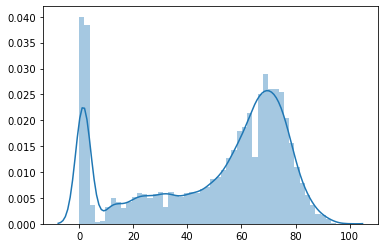

In [28]:
#the distribution of all the data after cleaning
sns.distplot(df);

In [29]:
df.tail()

age Position  overall   pac   sho   pas   dri   def   phy  \
3918  35.0        2     88.0  65.0  88.0  81.0  82.0  32.0  82.0   
3919  29.0        1     79.0  78.0  74.0  80.0  81.0  67.0  74.0   
3920  38.0        1     74.0  49.0  73.0  77.0  76.0  61.0  66.0   
3921  28.0        1     70.0  70.0  66.0  67.0  73.0  31.0  54.0   
3922  27.0        0     77.0  55.0  49.0  58.0  57.0  78.0  76.0   

      international_reputation  ...  long_shots  aggression interceptions  \
3918                         0  ...        85.0        84.0          20.0   
3919                         0  ...        81.0        76.0          75.0   
3920                         0  ...        74.0        61.0          67.0   
3921                         0  ...        63.0        41.0          31.0   
3922                         1  ...        56.0        82.0          81.0   

     positioning  vision  penalties  composure  marking  standing_tackle  \
3918        86.0    83.0       91.0       91.0     15.0             41.0   
3919        73.0    75.0       70.0       78.0     68.0             66.0   
3920        70.0    75.0       74.0       71.0     53.0             58.0   
3921        64.0    68.0       65.0       69.0     26.0             31.0   
3922        44.0    47.0       48.0       69.0     78.0             79.0   

      sliding_tackle  
3918            27.0  
3919            63.0  
3920            68.0  
3921            32.0  
3922            71.0  

[5 rows x 44 columns]

###  working on the classification features

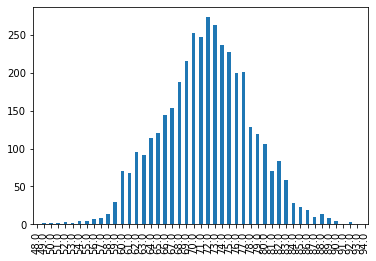

In [30]:
#the distribution of the data in the overall column
df['overall'].value_counts().sort_index().plot.bar()
plt.rcParams["figure.figsize"] = [12,5]

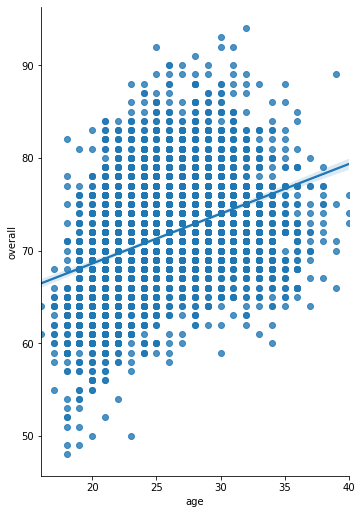

In [31]:
#checking the correlation between the age and the prefomance of the players
sns.pairplot(df, x_vars='age', y_vars='overall', height=7, aspect=0.7, kind='reg')

In [32]:
df.shape[0]

3922

### define the feature to 2 class 

In [33]:
rows = df.shape[0]+1

for row in range(1,rows):

    val = df.loc[row,'overall']
    if val<69 :
        df.loc[row,'overall'] = 0
    else :
        df.loc[row,'overall'] = 1

In [34]:
df['overall']

1       1.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
3918    1.0
3919    1.0
3920    1.0
3921    1.0
3922    1.0
Name: overall, Length: 3922, dtype: float64

In [35]:
df[["overall","age"]].groupby("overall").mean().reset_index().sort_values('age', ascending=False)

overall        age
1      1.0  27.023614
0      0.0  23.383319

### by using gropby it can be understood that old players are better 

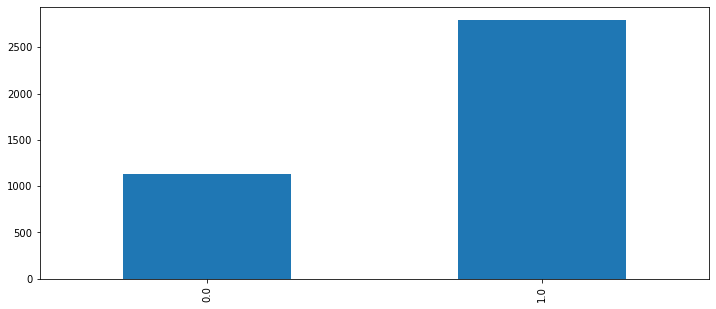

In [36]:
#visualizition of the distrubation after the changes
df['overall'].value_counts().sort_index().plot.bar()

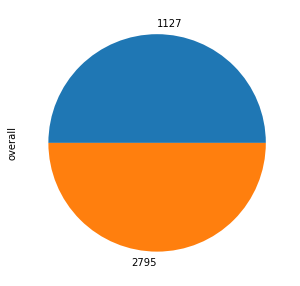

In [37]:
df['overall'].value_counts().value_counts(sort=False).plot.pie()
plt.show()

In [38]:
df

age Position  overall   pac   sho   pas   dri   def   phy  \
1     27.0        0      1.0  76.0  59.0  72.0  76.0  73.0  68.0   
2     37.0        0      1.0  23.0  35.0  52.0  51.0  72.0  70.0   
3     30.0        1      1.0  68.0  73.0  75.0  77.0  39.0  64.0   
4     30.0        1      1.0  83.0  64.0  71.0  82.0  38.0  62.0   
5     19.0        2      0.0  79.0  69.0  49.0  68.0  21.0  63.0   
...    ...      ...      ...   ...   ...   ...   ...   ...   ...   
3918  35.0        2      1.0  65.0  88.0  81.0  82.0  32.0  82.0   
3919  29.0        1      1.0  78.0  74.0  80.0  81.0  67.0  74.0   
3920  38.0        1      1.0  49.0  73.0  77.0  76.0  61.0  66.0   
3921  28.0        1      1.0  70.0  66.0  67.0  73.0  31.0  54.0   
3922  27.0        0      1.0  55.0  49.0  58.0  57.0  78.0  76.0   

      international_reputation  ...  long_shots  aggression interceptions  \
1                            0  ...        62.0        68.0          71.0   
2                            0  ...        26.0        66.0          68.0   
3                            0  ...        75.0        59.0          55.0   
4                            0  ...        57.0        57.0          42.0   
5                            1  ...        66.0        47.0          12.0   
...                        ...  ...         ...         ...           ...   
3918                         0  ...        85.0        84.0          20.0   
3919                         0  ...        81.0        76.0          75.0   
3920                         0  ...        74.0        61.0          67.0   
3921                         0  ...        63.0        41.0          31.0   
3922                         1  ...        56.0        82.0          81.0   

     positioning  vision  penalties  composure  marking  standing_tackle  \
1           63.0    68.0       59.0       72.0     76.0             75.0   
2           29.0    41.0       45.0       84.0     75.0             73.0   
3           75.0    74.0       79.0       77.0     28.0             34.0   
4           71.0    73.0       62.0       77.0     40.0             37.0   
5           59.0    42.0       63.0       70.0     13.0             22.0   
...          ...     ...        ...        ...      ...              ...   
3918        86.0    83.0       91.0       91.0     15.0             41.0   
3919        73.0    75.0       70.0       78.0     68.0             66.0   
3920        70.0    75.0       74.0       71.0     53.0             58.0   
3921        64.0    68.0       65.0       69.0     26.0             31.0   
3922        44.0    47.0       48.0       69.0     78.0             79.0   

      sliding_tackle  
1               77.0  
2               71.0  
3               35.0  
4               37.0  
5               19.0  
...              ...  
3918            27.0  
3919            63.0  
3920            68.0  
3921            32.0  
3922            71.0  

[3922 rows x 44 columns]

### Take a View of all features to gain insights

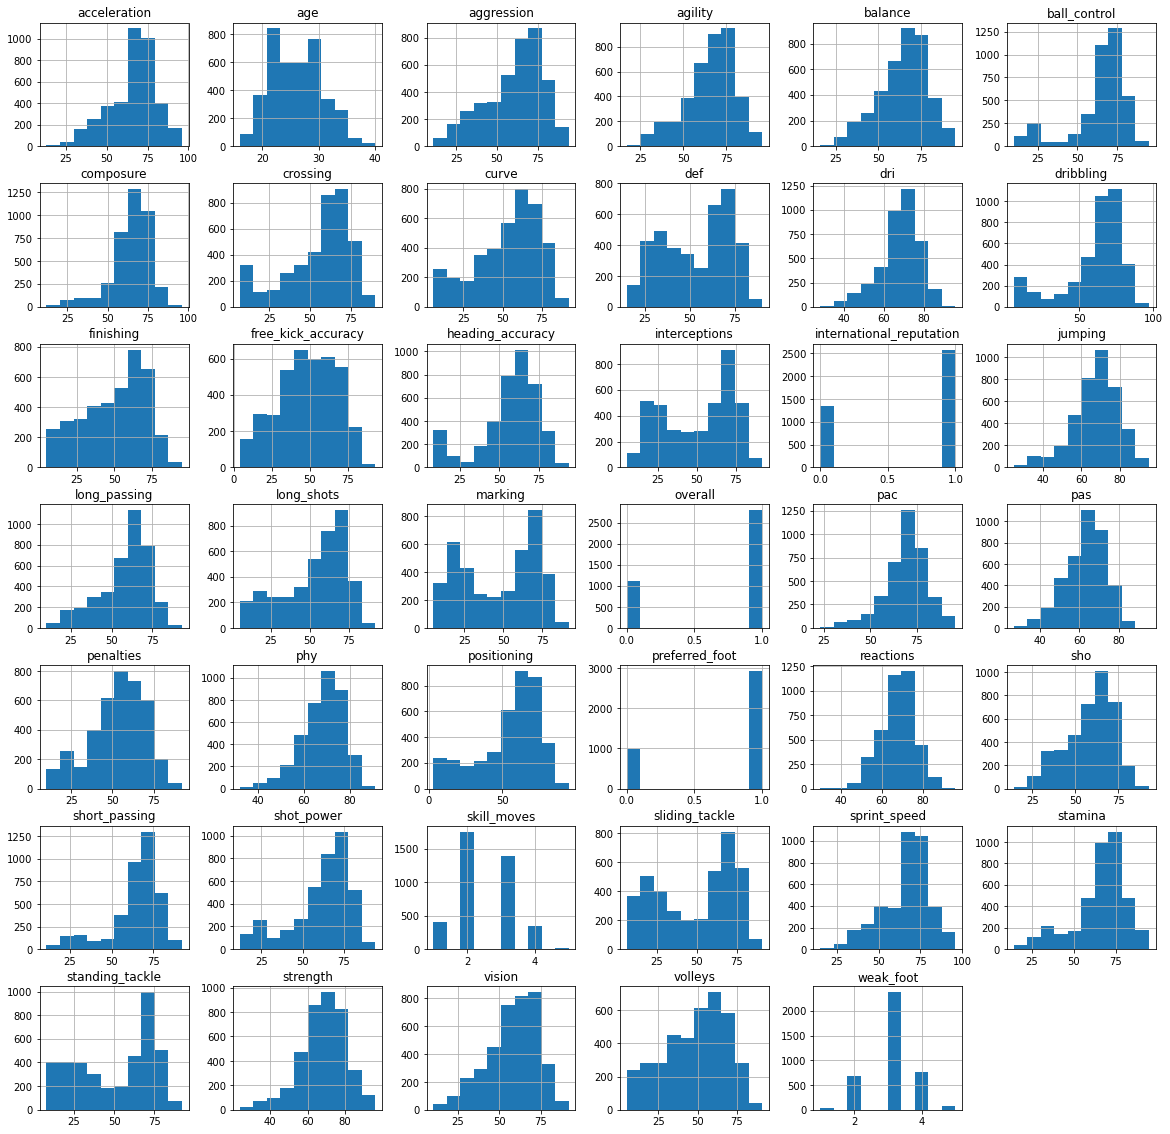

In [39]:
df.hist(figsize=(20,20));

### Heatmap of all features.

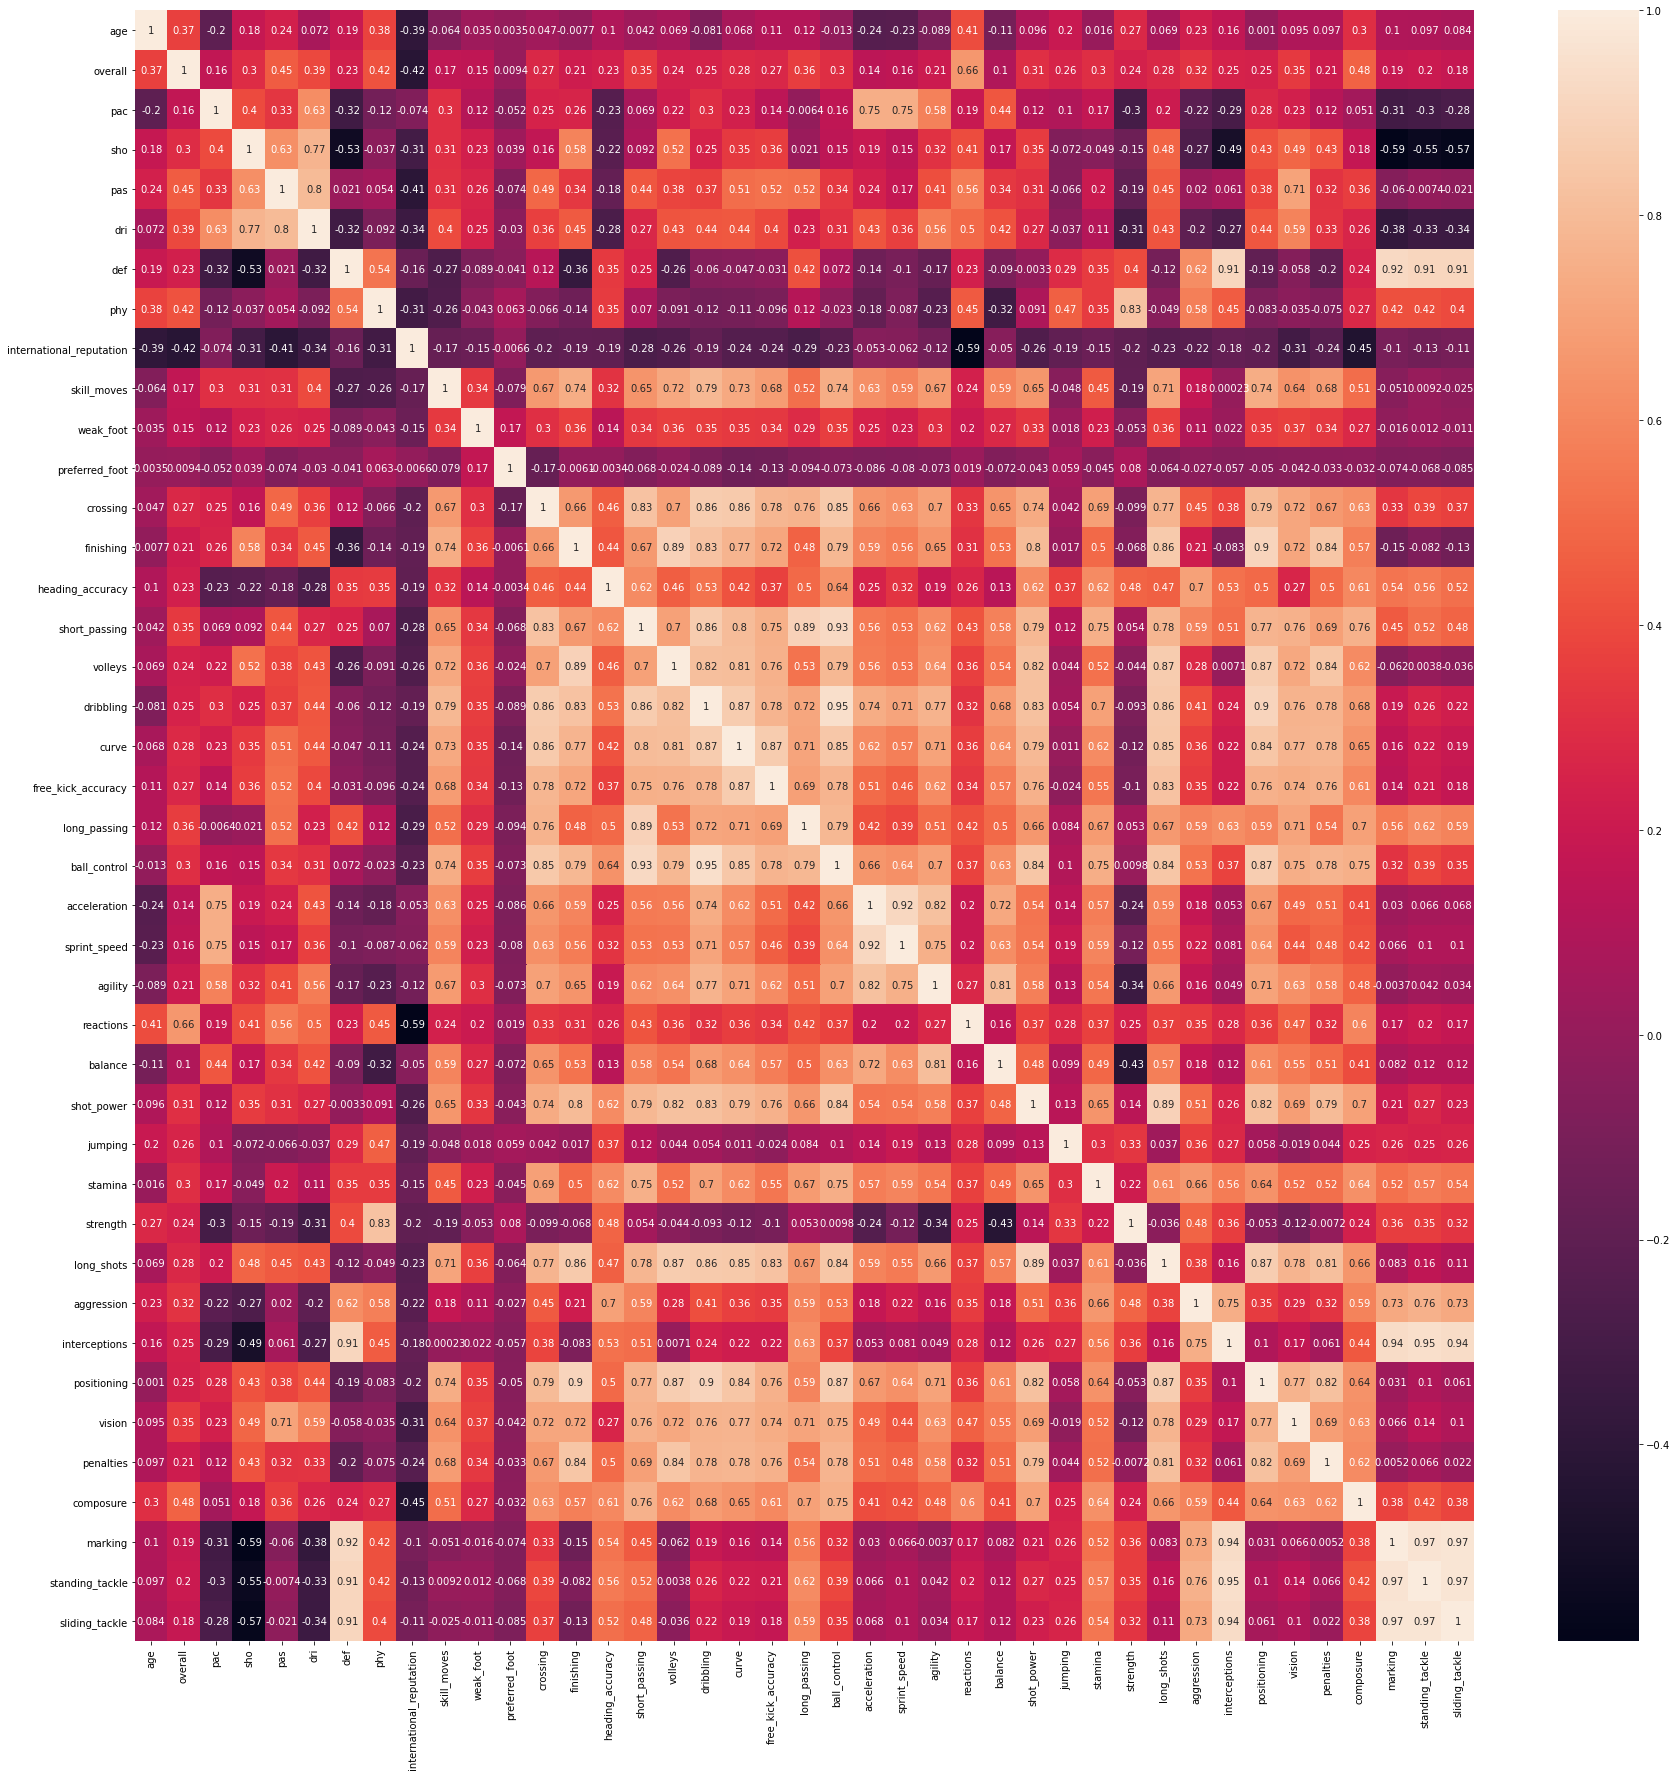

In [40]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cor, annot = True)

### heat map of all the feature with the correlation of the 'overall' feature 

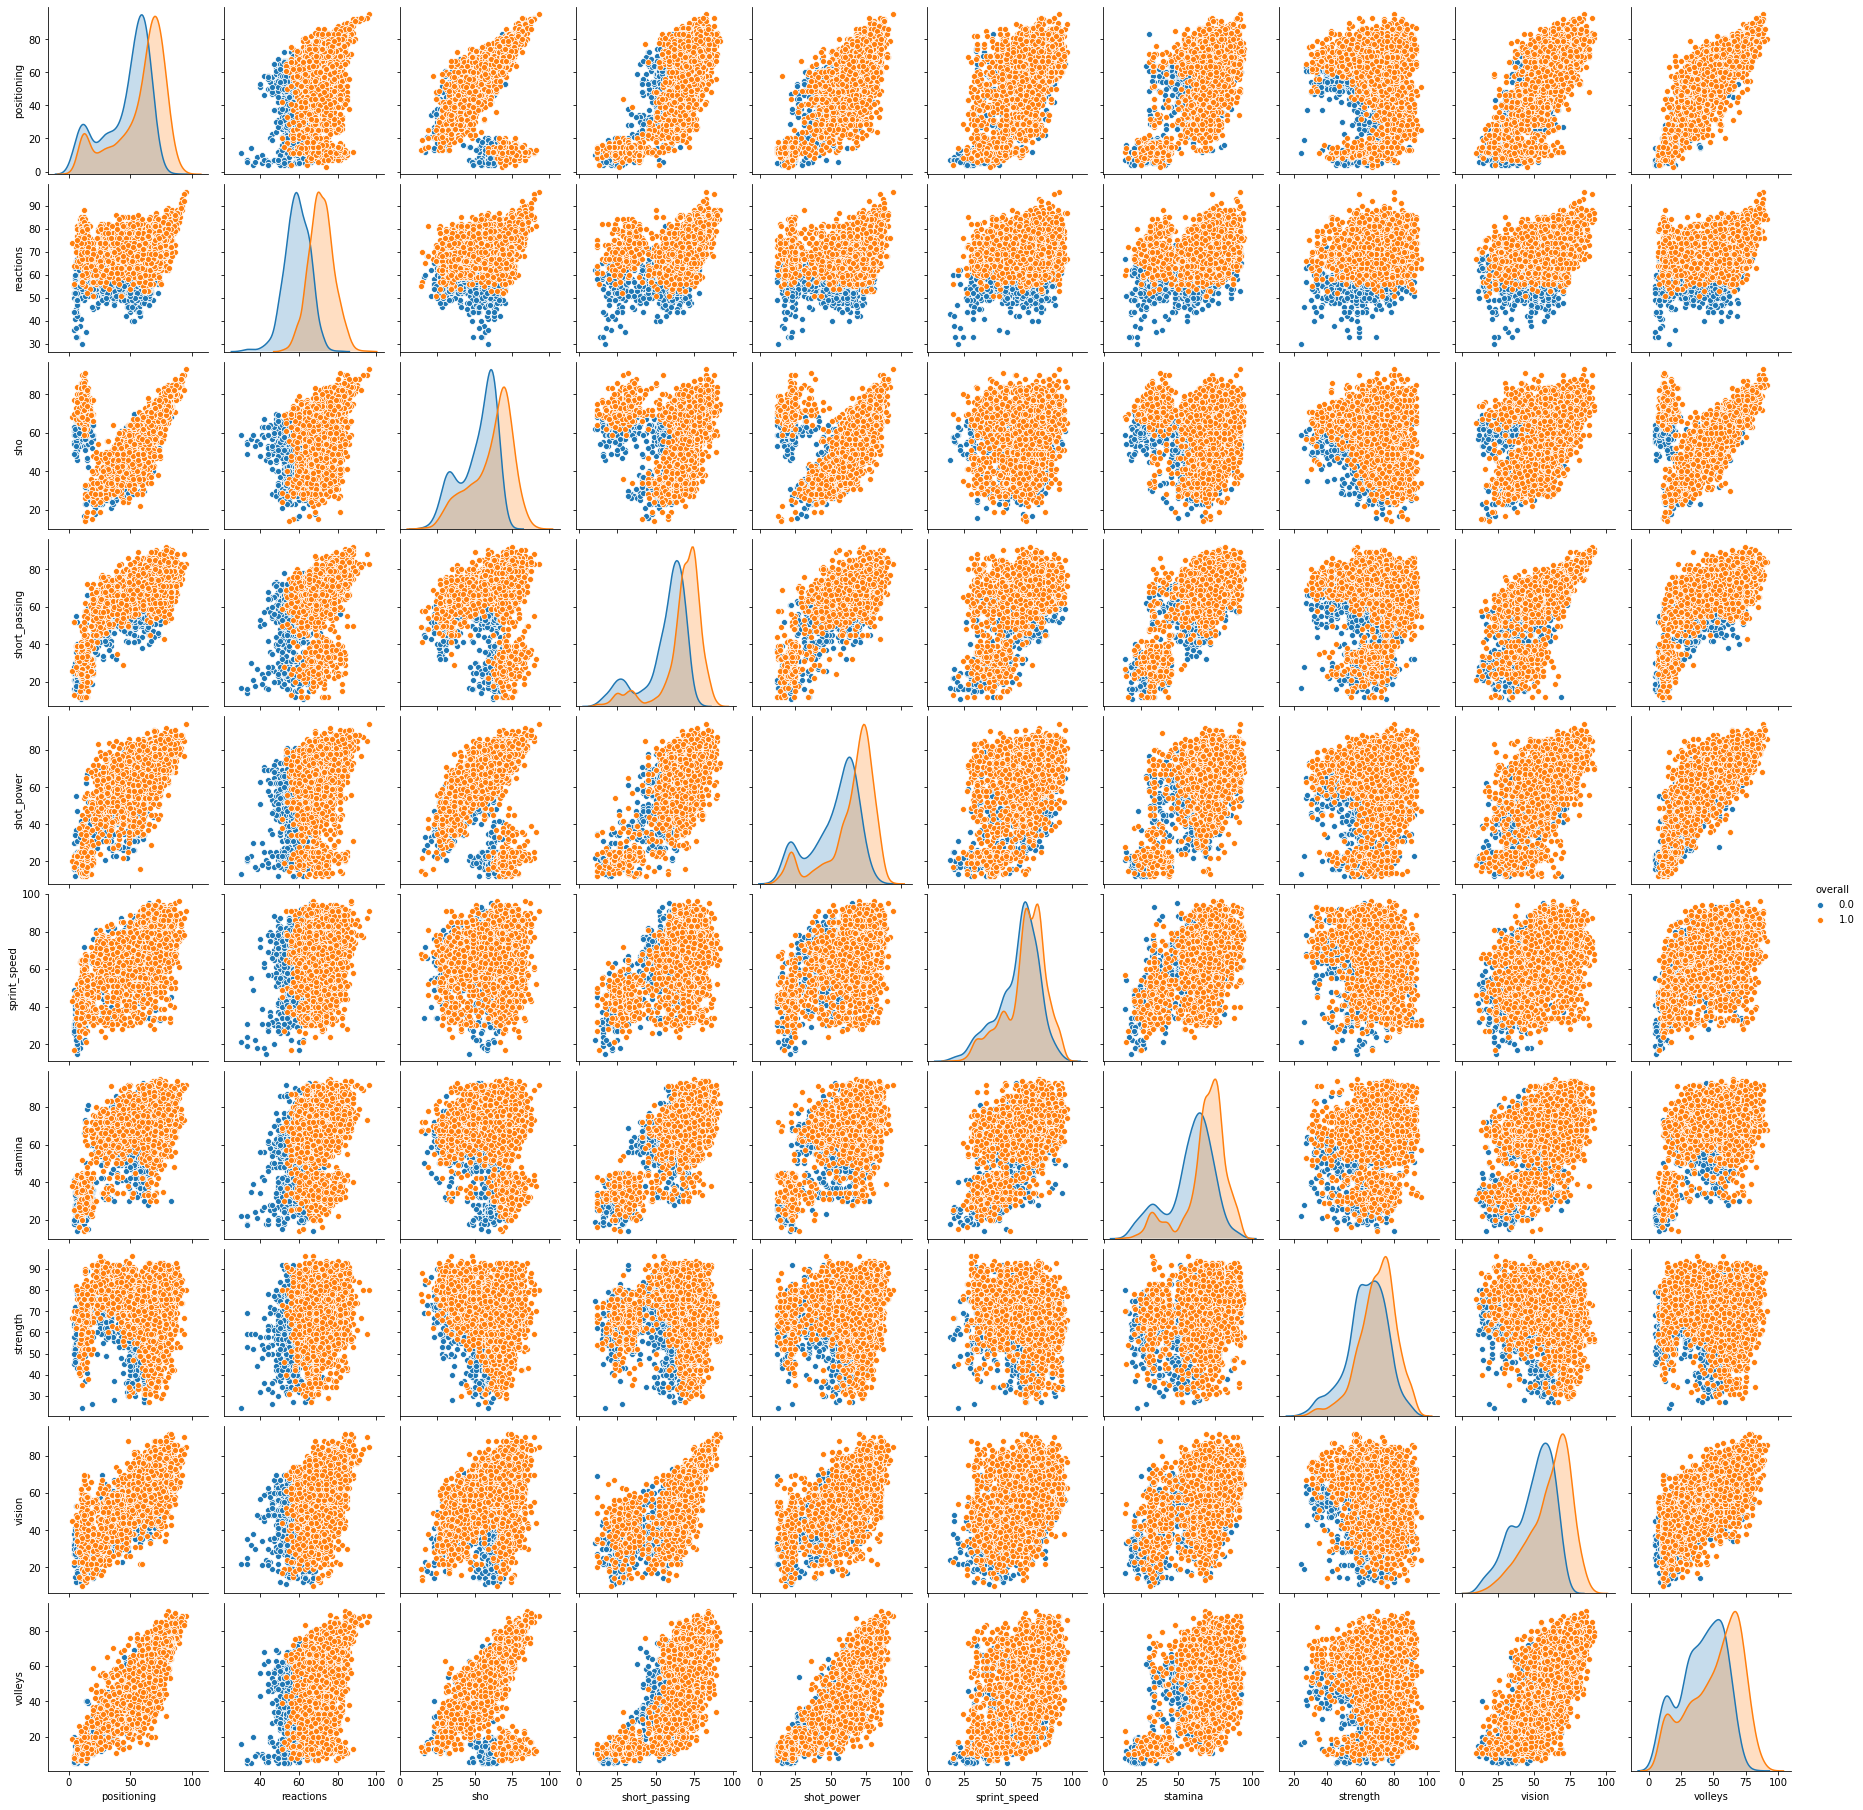

In [41]:
sns.pairplot(df, hue="overall",vars=["positioning","reactions","sho","short_passing","shot_power","sprint_speed","stamina","strength","vision","volleys"])

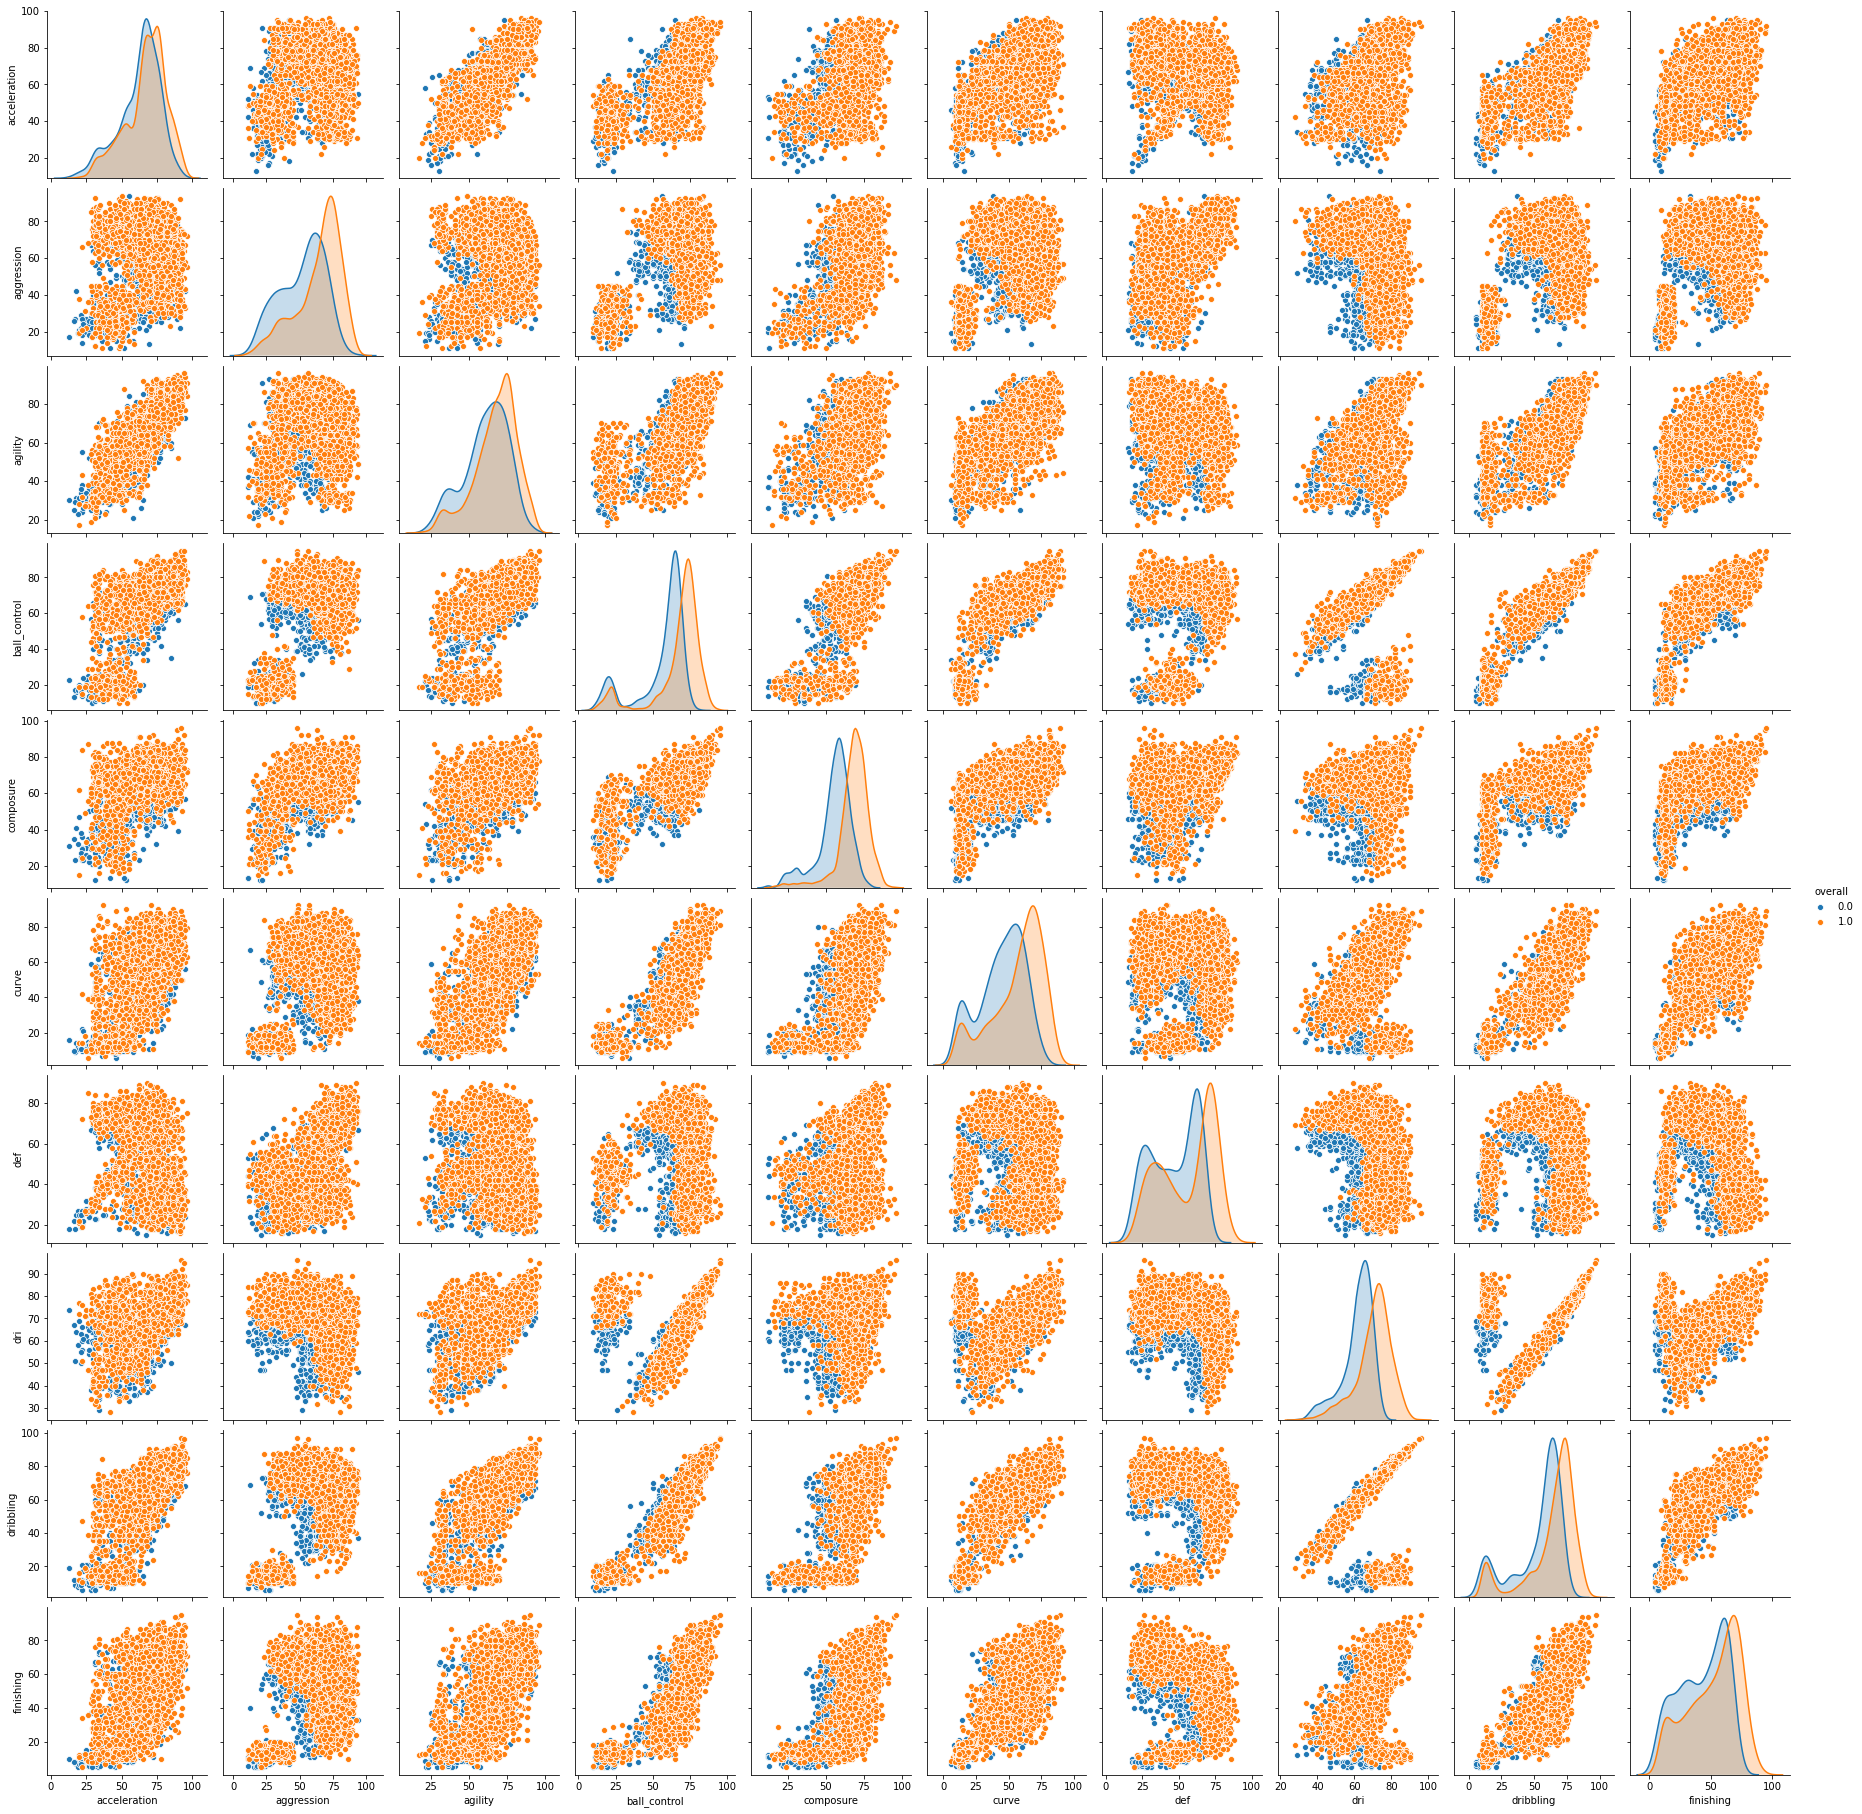

In [42]:
sns.pairplot(df, hue="overall",vars=["acceleration","aggression","agility","ball_control","composure","curve","def","dri","dribbling","finishing"])

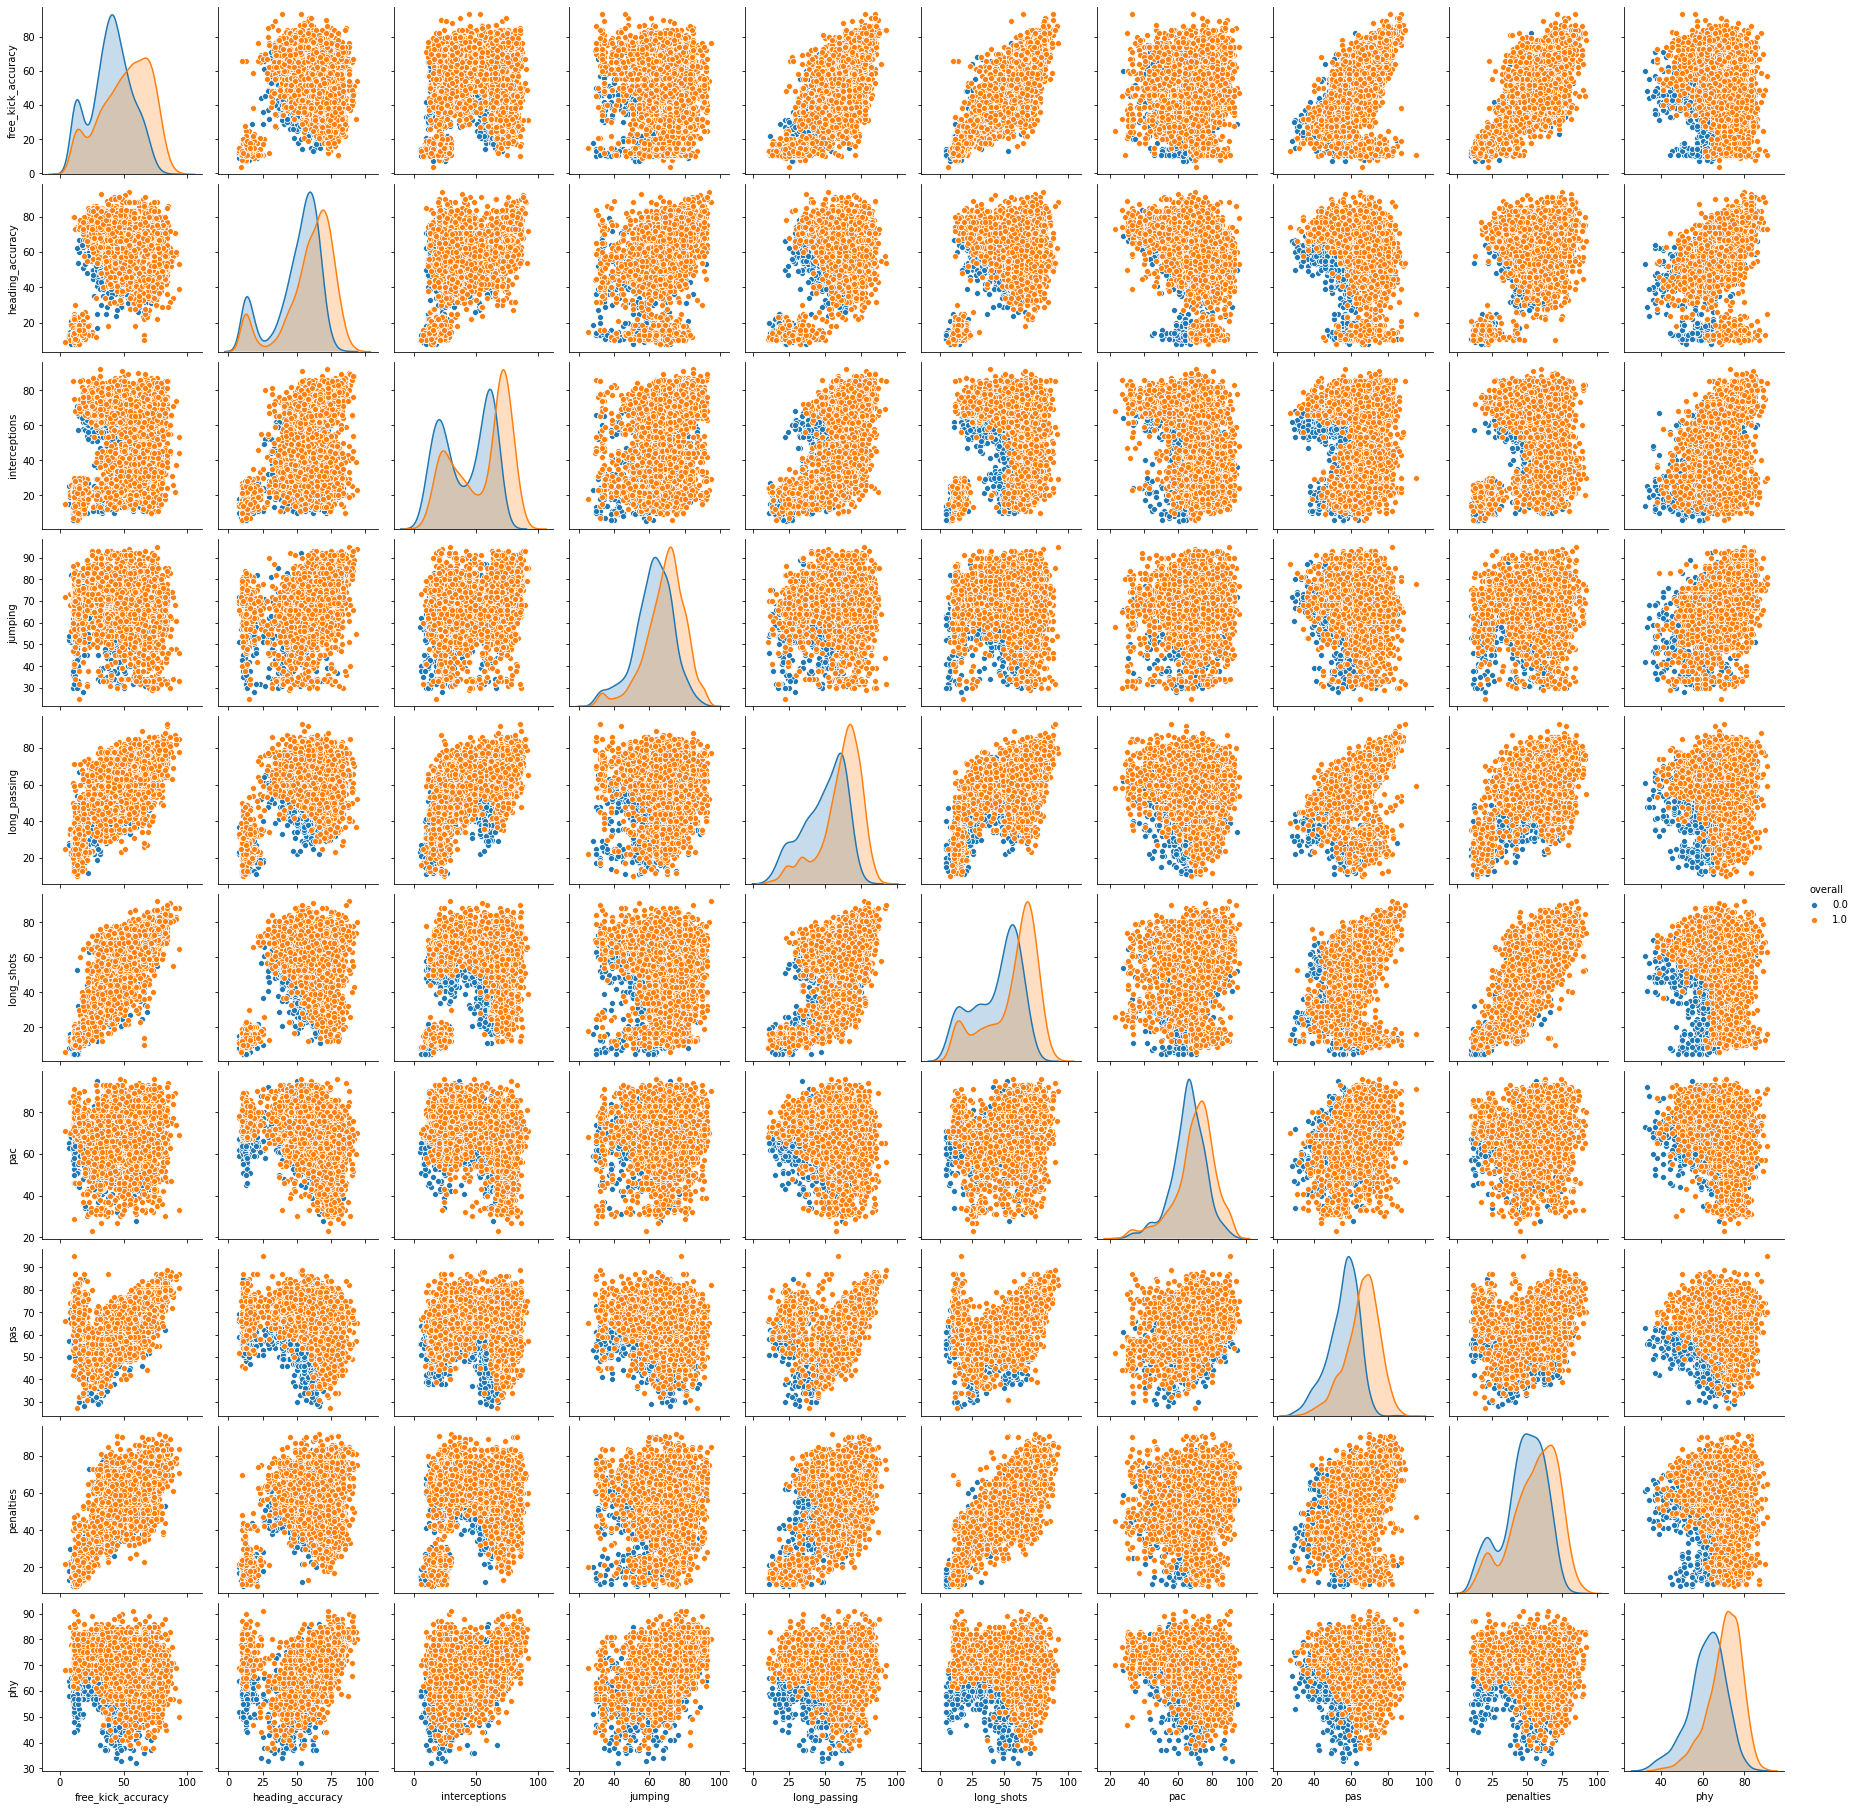

In [43]:
sns.pairplot(df, hue="overall",vars=["free_kick_accuracy","heading_accuracy","interceptions","jumping","long_passing","long_shots","pac","pas","penalties","phy"])

In [44]:
df[['overall','reactions']].groupby(['overall']).describe()

reactions                                                   
            count       mean       std   min   25%   50%   75%   max
overall                                                             
0.0        1127.0  59.030169  6.447973  30.0  55.0  59.0  64.0  81.0
1.0        2795.0  71.491234  6.391334  51.0  67.0  71.0  76.0  96.0

### by the gropby function we can see the high grade of reaction for a good overall 

### machine learning 

In [45]:
#define the vectors
X= df.drop(columns=['overall'])
Y = df.iloc[:, 2]
print(X)

       age Position   pac   sho   pas   dri   def   phy  \
1     27.0        0  76.0  59.0  72.0  76.0  73.0  68.0   
2     37.0        0  23.0  35.0  52.0  51.0  72.0  70.0   
3     30.0        1  68.0  73.0  75.0  77.0  39.0  64.0   
4     30.0        1  83.0  64.0  71.0  82.0  38.0  62.0   
5     19.0        2  79.0  69.0  49.0  68.0  21.0  63.0   
...    ...      ...   ...   ...   ...   ...   ...   ...   
3918  35.0        2  65.0  88.0  81.0  82.0  32.0  82.0   
3919  29.0        1  78.0  74.0  80.0  81.0  67.0  74.0   
3920  38.0        1  49.0  73.0  77.0  76.0  61.0  66.0   
3921  28.0        1  70.0  66.0  67.0  73.0  31.0  54.0   
3922  27.0        0  55.0  49.0  58.0  57.0  78.0  76.0   

      international_reputation  skill_moves  ...  long_shots aggression  \
1                            0          2.0  ...        62.0       68.0   
2                            0          2.0  ...        26.0       66.0   
3                            0          3.0  ...        75.0      

In [46]:
print(Y)

1       1.0
2       1.0
3       1.0
4       1.0
5       0.0
       ... 
3918    1.0
3919    1.0
3920    1.0
3921    1.0
3922    1.0
Name: overall, Length: 3922, dtype: float64


### predict accuracy by the knn model befor training

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, Y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(Y, y_pred))

1.0


In [49]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, Y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(Y, y_pred))

0.942886282508924


### searching for the best k for knn model 

In [50]:
k_range = list(range(1, 40))
scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    Y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(Y, Y_pred))

Text(0, 0.5, 'classified accuracy for each k')

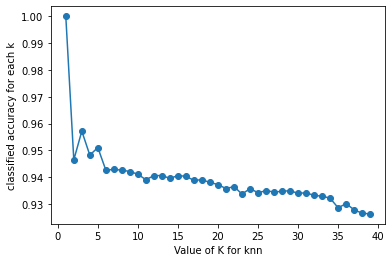

In [51]:
%matplotlib inline
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for knn')
plt.ylabel('classified accuracy for each k')

### define the parameters to  training the model 

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
#find the best k for knn after the training and testing
k_range = list(range(1, 40))
scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

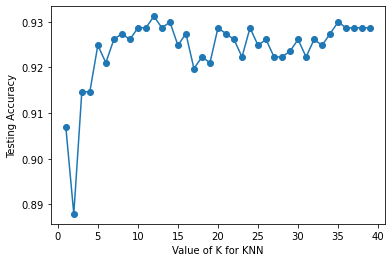

In [54]:
plt.plot(k_range, scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [55]:
#the accuracy of the best k until now by the graph
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.9312101910828026


###  the k=12 is the best

### searching the best knn after the cross validation 

In [51]:
k_range = list(range(1, 40))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

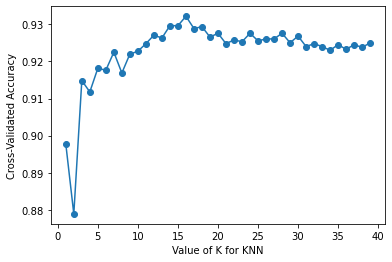

In [52]:
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### trying to get the best parameters for the knn model by the search grid function  

In [53]:
#grid search go by all the parameters we want to chek to get the best parameters to our model
grid_params = {
    'n_neighbors' : [3,7,12,19],
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs=GridSearchCV(
KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
)
gs_result = gs.fit(X_train, Y_train)
print(gs_result.best_score_)
print(gs_result.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.936243180522138
KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    4.7s finished


## weight function used in prediction. Possible values:

### uniform: uniform weights. All points in each neighborhood are weighted equally.

### distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

### metric= the distance metric to use for the tree

In [54]:
#the best parameters we get from the grid search
print(gs_result.best_params_)

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}


In [55]:
#using the grid search parameters to see the new accuracy result
knn = KNeighborsClassifier(n_neighbors=12,weights='distance',metric='manhattan')
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.9414012738853503


### when we change the k to 12 and specific the paranters we get a higher accuracy precentege 

### trying to get better precenteg with another model 

# random forest model

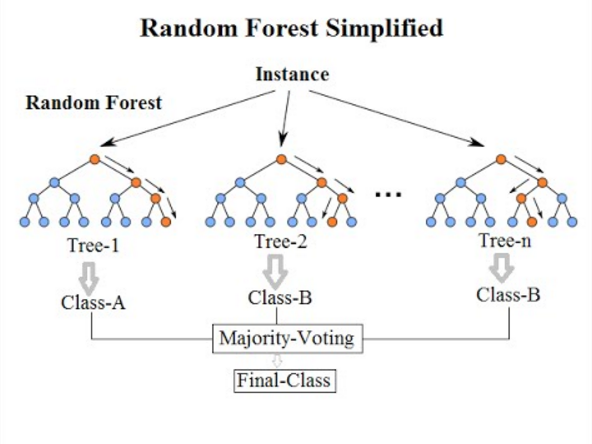

### n_estimators = number of trees in the foreset
### max_features = max number of features considered for splitting a node
### max_depth = max number of levels in each decision tree
### min_samples_split = min number of data points placed in a node before the node is split
### min_samples_leaf = min number of data points allowed in a leaf node

In [56]:
#trying to find the best estimator for the model
k_range = list(range(1,1000,50))
k_scores = []
for k in k_range:
    clf=RandomForestClassifier(n_estimators=k)
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    k_scores.append(metrics.accuracy_score(Y_test, y_pred))

Text(0, 0.5, 'random forest Accuracy for each k')

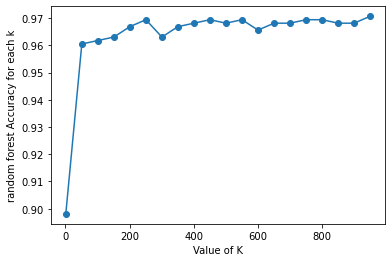

In [57]:
%matplotlib inline
plt.plot(k_range, k_scores ,marker='o')
plt.xlabel('Value of K')
plt.ylabel('random forest Accuracy for each k')

In [58]:
#a grid search at this point would not change a lot to the accuracy and will slow down the model

In [155]:
    clf=RandomForestClassifier(n_estimators=250)
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred))

0.9656050955414013


## higher than the knn model!

# the best accuracy is 96% by the random forest model

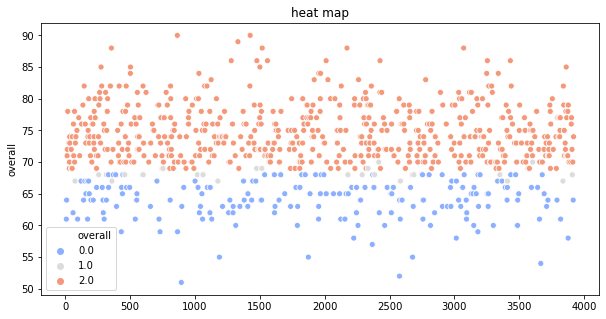

In [60]:
#heat map to show where are the bad location for the model to predict
plt.figure(figsize=(10,5))
plt.title("heat map")
yy=y_pred+Y_test
sns.scatterplot(x=df_no_change.index,y=df_no_change['overall'], hue=yy,palette=sns.color_palette('coolwarm', n_colors=3))

# DummyClassifier

In [61]:
strategies = ['most_frequent','stratified', 'uniform'] 
test_scores = [] 
for s in strategies: 
    if s == 'most_frequent':
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, Y_train) 
    score = dclf.score(X_test, Y_test) 
    test_scores.append(score) 
print(test_scores)

[0.732484076433121, 0.6292993630573248, 0.5197452229299363]


1.Most Frequent: The classifier always predicts the most frequent class label in the training data.

2.Stratified: It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.

3.Uniform: It generates predictions uniformly at random.

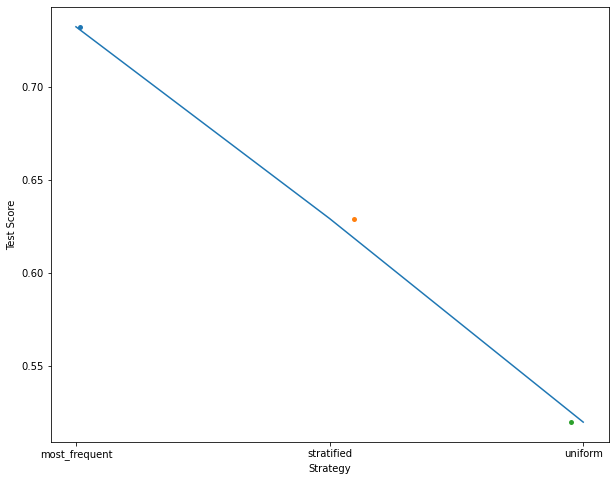

In [62]:
plt.figure(figsize=(10,8))
ax = sns.stripplot(strategies,test_scores)
sns.lineplot(x=strategies,y=test_scores,ax=ax)
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

### confusion matrix 

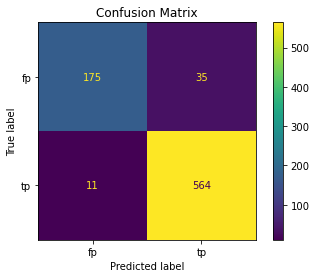

In [63]:
plot_confusion_matrix(knn, X_test, Y_test, display_labels= ['fp', 'tp'], normalize= None)
plt.title('Confusion Matrix')
plt.show()

###  classification report

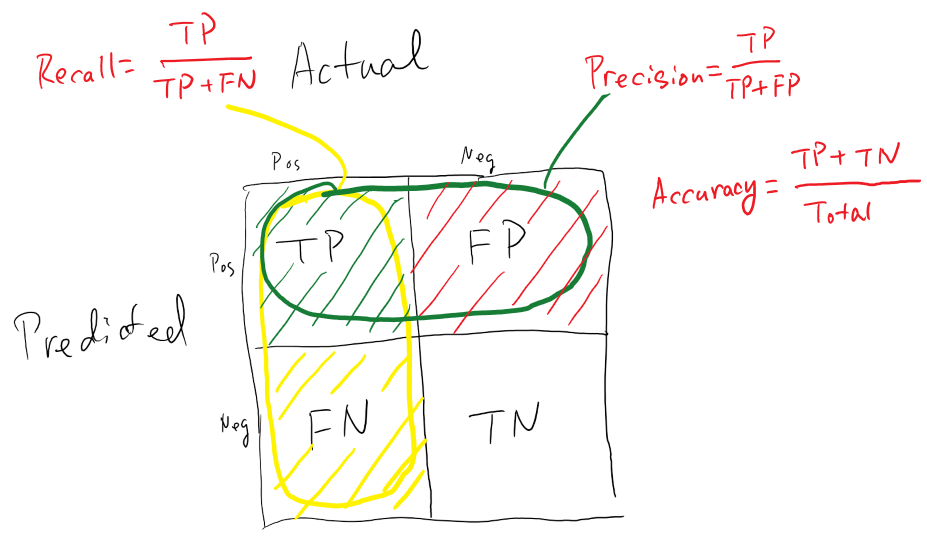

In [64]:
class_report = classification_report(Y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       210
         1.0       0.96      0.99      0.98       575

    accuracy                           0.96       785
   macro avg       0.97      0.94      0.95       785
weighted avg       0.96      0.96      0.96       785



## roc curve 

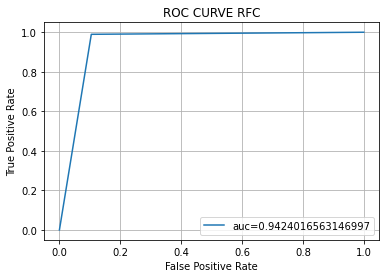

The Score for the ROC Curve is : 94.24%


In [65]:
fpr, tpr, _= roc_curve(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# conclusions

In [66]:
# we can see that the random forrest is slightly better than the KNN classifier, that is why i chose it as the best model for classifying overall players

# ensamble 

Supervised learning algorithms perform the task of searching through a hypothesis space to find a suitable hypothesis that will make good predictions with a particular problem.
Ensembles combine multiple hypotheses to form a better hypothesis. The term ensemble is usually reserved for methods that generate multiple hypotheses using the same base learner.

# pca

The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors,
where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.
Here
, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line.
These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated.
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data,
sometimes using only the first few principal components and ignoring the rest.

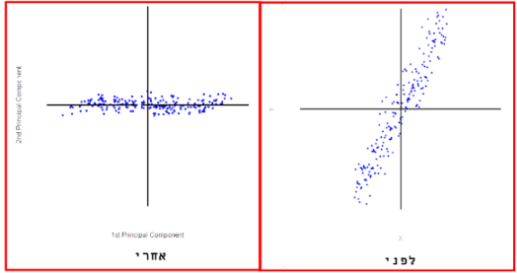

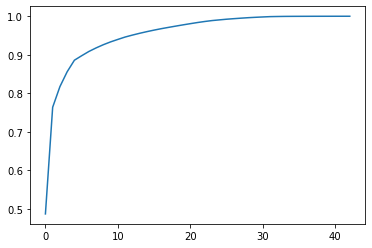

In [57]:
#checking how much components we can remove from the data without making a big reduce to the accuracy
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [196]:
#we saw that the elbow is long so we can remove 30 features
pca = PCA(n_components=0.95)
train_set_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("numer of attributes after PCA: ",pca.n_components_,"\nnumber of attributes before PCA: ",len(list(X_train.columns)))

numer of attributes after PCA:  13 
number of attributes before PCA:  43


13


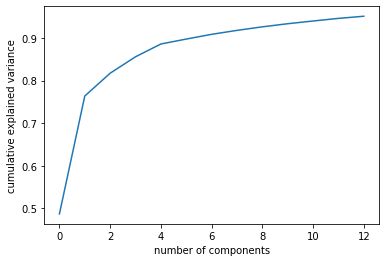

In [221]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca.n_components_)

In [197]:
# set the vectors with the new features
X_train_PCA1 = pd.DataFrame(train_set_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

# adaBoost

adaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

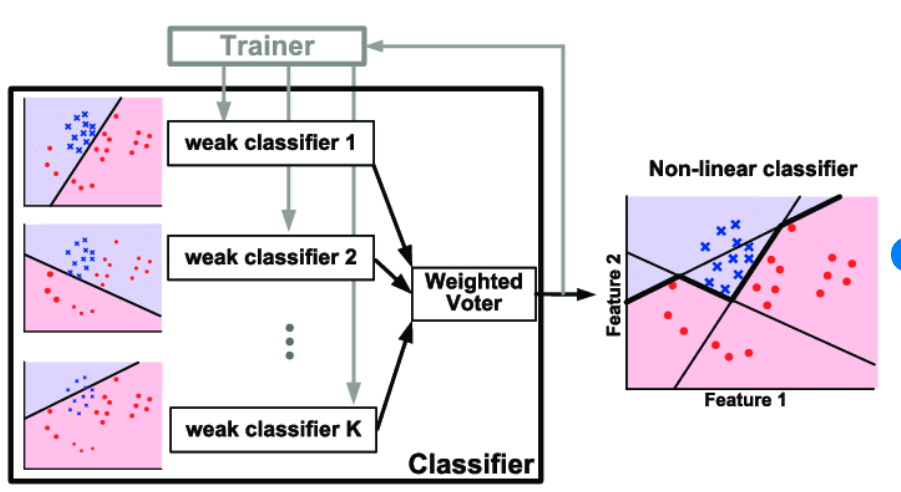

In [198]:
# set the adaboost model with the new form,after pca.
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,algorithm="SAMME.R",learning_rate=0.35
)
model=classifier.fit(X_train_PCA1, Y_train)

y_pred_ada = model.predict(X_test_pca)
ada_accuracy = metrics.accuracy_score(Y_test, y_pred_ada)

print("Test Accuracy score: {}".format(ada_accuracy))
print(metrics.classification_report( Y_test, y_pred_ada))

Test Accuracy score: 0.9363057324840764
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       210
         1.0       0.95      0.97      0.96       575

    accuracy                           0.94       785
   macro avg       0.93      0.91      0.92       785
weighted avg       0.94      0.94      0.94       785



In [133]:
# making a grid search to tuning the adaboost model with the best parameters it can give
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              "base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              'learning_rate':[0.01,0.1]}

clf = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
clf.fit(X_train_PCA1, Y_train)
y_pred_ada = clf.predict(X_test_pca)
ada_accuracy = metrics.accuracy_score(Y_test, y_pred_ada)

print("Test Accuracy score: {}".format(ada_accuracy))
print(metrics.classification_report( Y_test, y_pred_ada))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 24.7min finished


Test Accuracy score: 0.9426751592356688
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       210
         1.0       0.96      0.97      0.96       575

    accuracy                           0.94       785
   macro avg       0.93      0.92      0.93       785
weighted avg       0.94      0.94      0.94       785



In [134]:
#the best parameters we get from the gridsearch
best_model = clf.best_estimator_
best_model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         min_samples_leaf=10,
                                                         splitter='random'),
                   learning_rate=0.1, n_estimators=1000)

# xgBoost

xgBoost uses a more regularized model formalization to control over-fitting, which gives it better performance to get a better aacuucracy

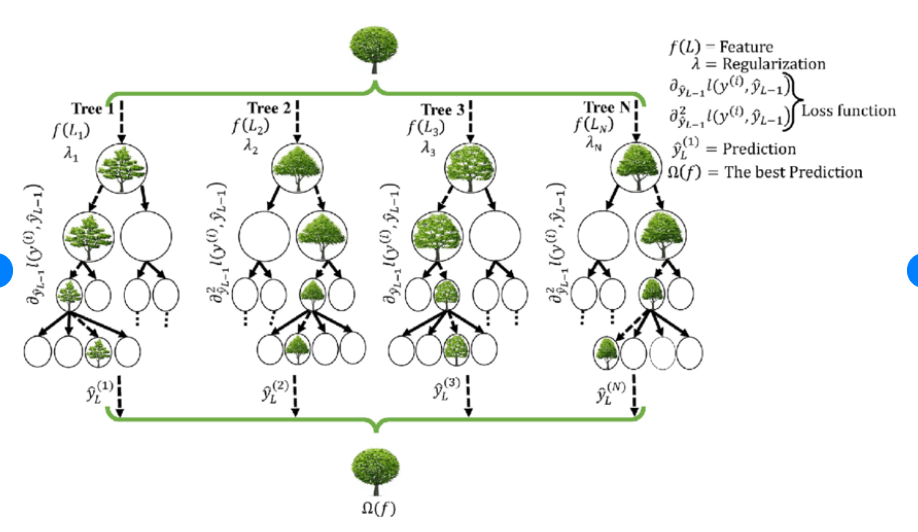

In [199]:
# set the xgboost model.
xgb_reg = xgboost.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_reg.fit(X_train_PCA1, Y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_PCA1)
xgb_reg_accuracy = metrics.accuracy_score(Y_test, y_pred_xgb_reg)

print("Test Accuracy score: {}".format(xgb_reg_accuracy))
print(metrics.classification_report(Y_test, y_pred_xgb_reg))

Test Accuracy score: 0.9452229299363057
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       210
         1.0       0.95      0.98      0.96       575

    accuracy                           0.95       785
   macro avg       0.94      0.92      0.93       785
weighted avg       0.94      0.95      0.94       785



In [4]:
# making a grid search to tuning the xgboost model with the best parameters it can give
xgb_model = xgboost.XGBClassifier(objective = "binary:logistic")

params = {
            'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist(),
            'learning_rate':np.arange(0.01,0.1,0.2,0.35).tolist()
        }

skf = StratifiedKFold(n_splits=10, shuffle = True)

grid = GridSearchCV(xgb_model, 
                    param_grid = params,  
                    n_jobs = -1, 
                    cv = skf.split(X_train_PCA1, Y_train),
                    refit = "accuracy_score",
                    )

grid=grid.fit(X_train_PCA1, Y_train)
y_pred_xgb_reg = grid.predict(X_test_PCA1)
xgb_reg_accuracy = metrics.accuracy_score(Y_test, y_pred_xgb_reg)

print("Test Accuracy score: {}".format(xgb_reg_accuracy))
print(metrics.classification_report(Y_test, y_pred_xgb_reg))

SyntaxError: invalid syntax (<ipython-input-4-6874ebd95530>, line 4)

In [302]:
#the best parameters we get from the gridsearch
grid_model = grid.best_estimator_
grid_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94,
              eta=0.25000000000000006, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.61,
              tree_method='exact', validate_parameters=1, verbosity=None)

# LogisticRegression

Logistic regression is a linear algorithm (with a non-linear transform on output).
It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model

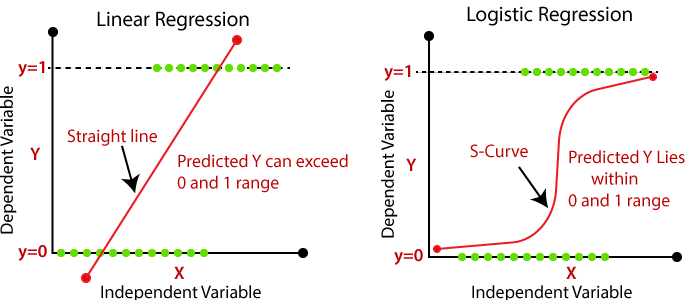

In [200]:
# set the LogisticRegression model.
clf = LogisticRegression(solver="lbfgs", random_state=42)
clf.fit(X_train_PCA1,Y_train)
y_pred_logistic= clf.predict(X_test_PCA1)
print("Test Accuracy score: {}".format(metrics.accuracy_score(Y_test, y_pred_logistic)))
print(metrics.classification_report(Y_test, y_pred_logistic))

Test Accuracy score: 0.8687898089171975
              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       210
         1.0       0.91      0.92      0.91       575

    accuracy                           0.87       785
   macro avg       0.83      0.83      0.83       785
weighted avg       0.87      0.87      0.87       785



after we saw the accuracy of each model with his algorithm,we will try to combine the models to one model to improve his accuracy by "voting" algohrithm

# Voting

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

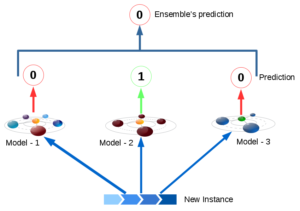

In [220]:
# set the voting model.
log_clf = LogisticRegression(solver="lbfgs")
xgb_clf = xgboost.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)

ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=8,
                                                         min_samples_leaf=10,
                                                         splitter='random'),
                   learning_rate=0.1, n_estimators=1000)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('xgb', xgb_clf),('ada', ada_clf)],
    voting='hard',n_jobs=-1)
voting_clf.fit(X_train_PCA1,Y_train)
for clf in( log_clf, xgb_clf, ada_clf,voting_clf):
    clf.fit(X_train_PCA1,Y_train)
    y_pred_clf=clf.predict(X_test_PCA1)
    print(clf.__class__.__name__,accuracy_score(Y_test,y_pred_clf))

LogisticRegression 0.8687898089171975
XGBClassifier 0.9452229299363057
AdaBoostClassifier 0.9490445859872612
VotingClassifier 0.954140127388535


i tried some other models of algorhitm such as: bagging,Gaussian Naive Bayes,stacking but there score was far away lower or big and not compact.

the accuracy of knn before pca is 94% and random forest 96%
after we remove almost 75% of the data with pca from 43 features to 13
we get 95% accuracy with voting model that include in it the best models we found:
    xgboost:94.5
    adaboost:94.5
    LogisticRegression:86%

# voting with 95.41% accuracy after pca and reducing of 75% of the data is much better>>> than a full data model with 94% accuracy with knn ,odel.